<a href="https://colab.research.google.com/github/fakehaa/ML-PR/blob/main/MLPR_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
img1= cv2.imread('messi.jpg')
type(img1)


numpy.ndarray

In [4]:
img2 = cv2.imread('lion.webp')
type(img2)


numpy.ndarray

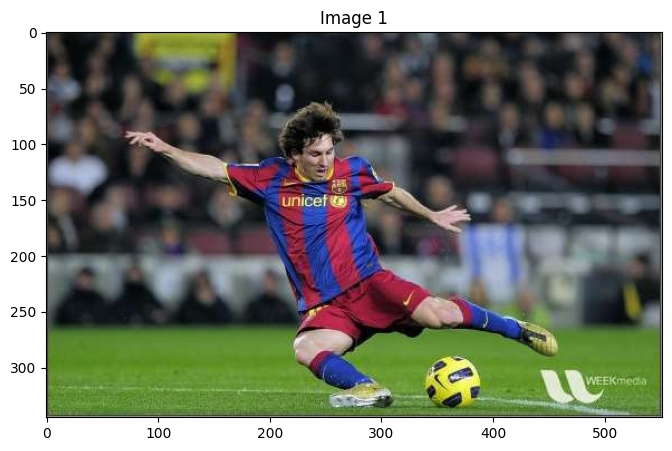

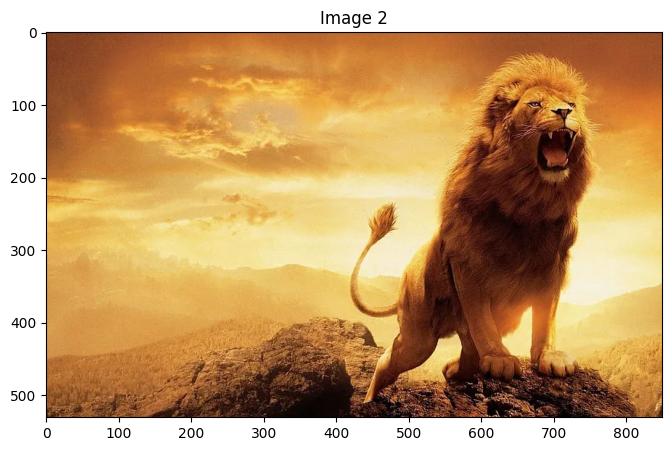

In [5]:
# convert the images from bgr to rgb
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# show the images for reference
plt.figure(figsize=(10,5))
plt.imshow(img1)
plt.title('Image 1')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(img2)
plt.title('Image 2')
plt.show()


(345, 552)


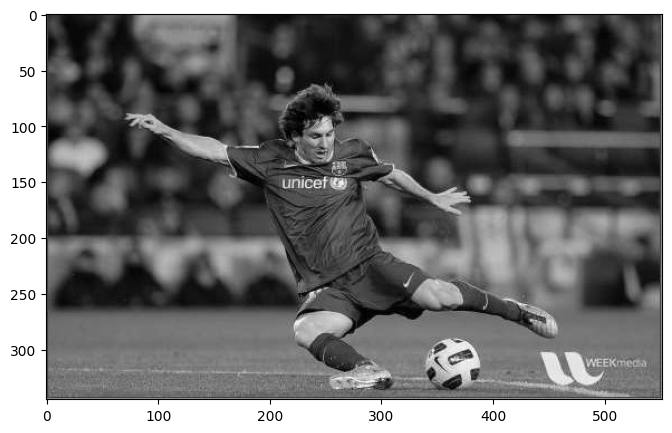

In [6]:
img1_gray= cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
print(img1_gray.shape)

plt.figure(figsize=(10,5))
plt.imshow(img1_gray,cmap='gray', vmin=0, vmax=255)
plt.show()


Height and width of original image 345 552
Original Image


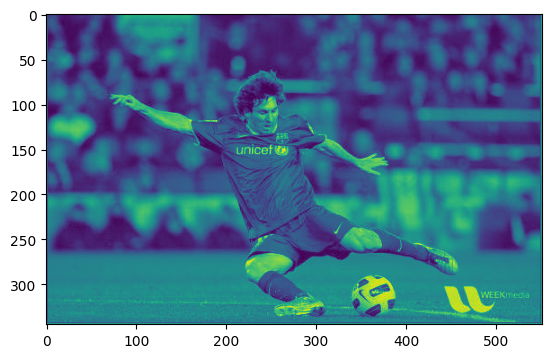

Rotated Image


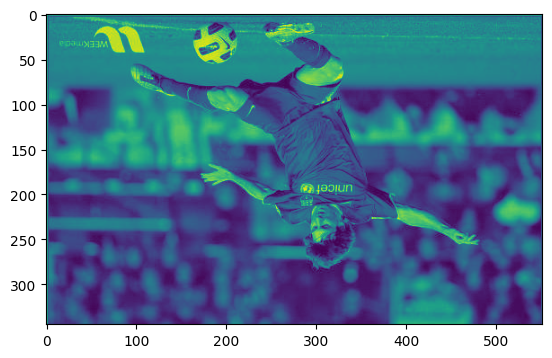

In [7]:
# First we need to obtain the center of original image by dividing height and width by 2
height, width = img1_gray.shape[:2]
print("Height and width of original image", height, width)
# get the coordinates of the center of the image to create the 2D rotation matrix
center = (width/2, height/2)
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)

# rotate the image using cv2.warpAffine
rotated_image1 = cv2.warpAffine(src=img1_gray, M=rotate_matrix, dsize=(width, height))
print("Original Image")
plt.imshow(img1_gray)
plt.show()
print("Rotated Image")
plt.imshow(rotated_image1)
plt.show()


(345, 552, 3)


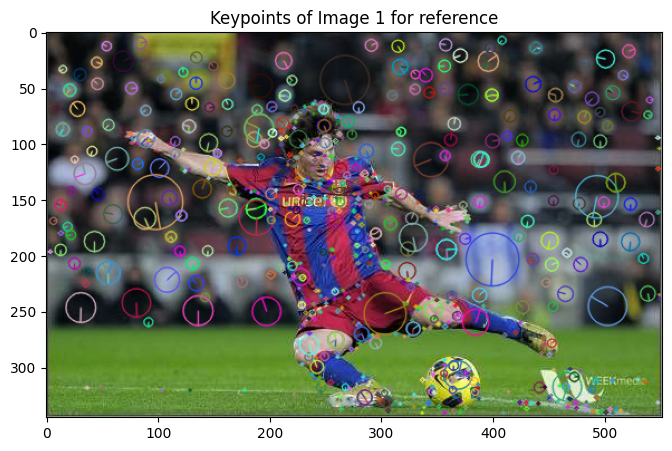

In [8]:
sift = cv2.SIFT_create()
kp = sift.detect(img1,None)

keypoints=cv2.drawKeypoints(img1,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv2.imwrite('sift_keypoints.jpg',img1)

print(keypoints.shape)
plt.figure(figsize=(10,5))
plt.imshow(keypoints)
plt.title('Keypoints of Image 1 for reference')
plt.show()


In [9]:
# using SIFT detect the feature descriptors of the 2 images
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img1_gray,None)

len(keypoints_1), len(keypoints_2)


(774, 770)

In [10]:
# create a bruteforce matcher
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)


In [11]:
len(matches)

583

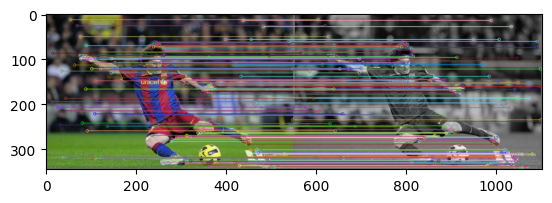

It's a Match!!!


In [12]:
img3 = cv2.drawMatches(img1, keypoints_1, img1_gray, keypoints_2, matches[:200], img1_gray, flags=2)
plt.imshow(img3),plt.show()

# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
  print("It's a Match!!!")

else:
  print("The two images do not match")


In [13]:
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_3, descriptors_3 = sift.detectAndCompute(rotated_image1,None)

len(keypoints_1), len(keypoints_3)


(774, 742)

In [14]:
# create a bruteforce matcher
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_3)
matches = sorted(matches, key = lambda x:x.distance)


In [15]:
len(matches)

537

In [18]:
Img4 = cv2.drawMatches(img1, keypoints_1, rotated_image1, keypoints_3, matches[:200], rotated_image1, flags=2)


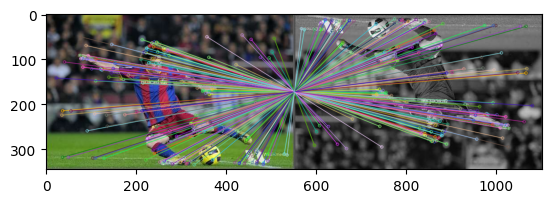

It's a Match!!!


In [19]:
plt.imshow(Img4),plt.show()

# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
  print("It's a Match!!!")

else:
  print("The two images do not match")


In [20]:
# using SIFT detect the feature descriptors of the 2 images
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_4, descriptors_4 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_4)


(774, 1188)

In [21]:
# create a bruteforce matcher
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_4)
matches = sorted(matches, key = lambda x:x.distance)


In [22]:
len(matches)

210

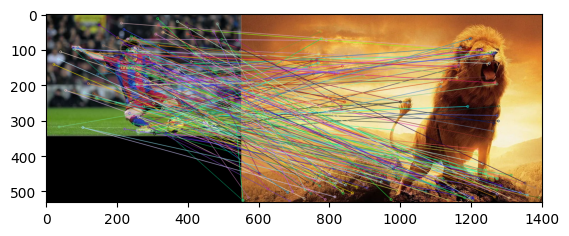

The two images do not match


In [24]:
Img5 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_4, matches[:200], img2, flags=2)
plt.imshow(Img5),plt.show()

# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
  print("It's a Match!!!")

else:
  print("The two images do not match")
